# Lab2: Customer Analysis Round 2

In [693]:
import pandas as pd
import numpy as np

In [694]:
data_mca=pd.read_csv('marketing_customer_analysis.csv')

In [695]:
data_mca.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [696]:
#1 Show the dataframe shape

In [697]:
print(data_mca.shape)

(10910, 26)


In [698]:
#2 Standardize header names

In [699]:
#use lower cases on all header names
col = []
for i in range(len(data_mca.columns)):
    col.append(data_mca.columns[i].lower())
data_mca.columns = col
data_mca

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [700]:
#for more standardization, I rename a column name to divide a word in two
data_mca=data_mca.rename(columns={'employmentstatus':'employment status'})
data_mca.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [701]:
#3. Which columns are numerical?

In [702]:
data_mca.select_dtypes(np.number).head()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645


In [703]:
#numerical columns are: index, unnamed:0, customer lifetime value, income, monthly premium auto, months since the last claim, months since policy inception, number of open complaints, number of policies, total claim ammount
#--> seems ok

In [704]:
#4. Which columns are categorical?

In [705]:
data_mca.select_dtypes(object).head()

,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN


In [706]:
#numerical columns are: customer, state, response, coverage, eduation, effective to data, employment status, gender, location code, marital status, policy type, policy, renew offer typ, sales channel, vehicle class, vehicle size, vehicle type
# --> seems correct

In [707]:
#5. Check and deal with NaN values

In [708]:
data_mca.isna().sum()
# following columns seem problematic: state, response, months since last claim, number of open complaints, vehicle class, vehicle size, vehicle type
#vehicle type: 5482 NaN by 10910 rows --> column has to go
# the others have all 631,622 or 633 NaN --> could be a row problem?

unnamed: 0                          0
customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [709]:
#delete unhelpful column 'vehicle type'
data_mca = data_mca.drop(['vehicle type'], axis=1)
data_mca.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


In [710]:
#delete unhelpful column 'unnamed: 0':
data_mca = data_mca.drop(['unnamed: 0'], axis=1)
data_mca.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


In [711]:
    #filtering combinations of 2 columns with the same numbers of nan (pairs):
#data_mca[(data_mca['state'].isna())&(data_mca['response'].isna())] #631 rows for pair1
#data_mca[(data_mca['months since last claim'].isna())&(data_mca['number of open complaints'].isna())] #633 rows for pair2
#data_mca[(data_mca['vehicle class'].isna())&(data_mca['vehicle size'].isna())] #622 rows for pair3

    #filtering combinations of 2 pairs:
#data_mca[(data_mca['state'].isna())&(data_mca['response'].isna())&(data_mca['months since last claim'].isna())&(data_mca['number of open complaints'].isna())]
    #pair1 and 2: 42 rows
#data_mca[(data_mca['state'].isna())&(data_mca['response'].isna())&(data_mca['vehicle class'].isna())&(data_mca['vehicle size'].isna())]
    #pair1 and 3: 31 rows
#data_mca[(data_mca['months since last claim'].isna())&(data_mca['number of open complaints'].isna())&(data_mca['vehicle class'].isna())&(data_mca['vehicle size'].isna())]
    #pair2 and 3: 42 rows
    
#filtering all 6 nan-columns together:
#data_mca[(data_mca['state'].isna())&(data_mca['response'].isna())&(data_mca['months since last claim'].isna())&(data_mca['number of open complaints'].isna())&(data_mca['vehicle class'].isna())&(data_mca['vehicle size'].isna())]
#5 rows

In [712]:
#Decision against dropping single rows, because just 5 rows have a nan in 6 (out of 24) columns
#Instead, finding another way to deal with the nans in the 6 columns

In [713]:
#In order to clean the df some more (and hopefully some of the nan), I check for duplicates and remove if any

In [714]:
sum(data_mca.duplicated())
data_mca.drop_duplicates(inplace=True)
sum(data_mca.duplicated())
#56 duplicates deleted

0

In [715]:
data_mca.isna().sum()

customer                           0
state                            612
customer lifetime value            0
response                         612
coverage                           0
education                          0
effective to date                  0
employment status                  0
gender                             0
income                             0
location code                      0
marital status                     0
monthly premium auto               0
months since last claim          618
months since policy inception      0
number of open complaints        618
number of policies                 0
policy type                        0
policy                             0
renew offer type                   0
sales channel                      0
total claim amount                 0
vehicle class                    595
vehicle size                     595
dtype: int64

In [716]:
#dealing with state:
data_mca[(data_mca['state'].isna())]
data_mca['state'].value_counts()

California    3540
Oregon        2895
Arizona       1933
Nevada         989
Washington     885
Name: state, dtype: int64

In [717]:
#use 'other' to fill na 
#--> Most answers by far California
#--> decision for fill in with the most common value:
data_mca['state'] = data_mca['state'].fillna('others')
data_mca['state'].value_counts()

California    3540
Oregon        2895
Arizona       1933
Nevada         989
Washington     885
others         612
Name: state, dtype: int64

In [718]:
#dealing with response:
# not sure if important that response is missing for further investigation
#--> fill na with 'no answer':
data_mca['response'] = data_mca['response'].fillna('no answer')
data_mca['response'].value_counts()

No           8782
Yes          1460
no answer     612
Name: response, dtype: int64

In [719]:
data_mca.head(50)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
5,HO81102,others,4745.181764,no answer,Basic,High School or Below,2/14/11,Employed,M,50549,...,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize
7,IH64929,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,87197,...,45,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize
8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,66839,...,24,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize
9,QX31376,Oregon,17114.328150,No,Extended,Master,1/4/11,Employed,F,70961,...,8,0.0,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small


In [720]:
#dealing with months since last claim
data_mca['months since last claim'].value_counts()
#--> very mixed answers, no common value --> makes sense to use here the mean or median

mean_monthssincelastclaim = data_mca['months since last claim'].mean()
mean_monthssincelastclaim
data_mca['months since last claim']=data_mca['months since last claim'].fillna(mean_monthssincelastclaim)

In [721]:
#dealing with number of open complaints 
#--> values: 0.0: 8128, 1.0: 1140, 2.0: 414...
#--> decision for fill in with mean:


mean_numberofopencomplaints = data_mca['number of open complaints'].mean()
mean_numberofopencomplaints
data_mca['number of open complaints']=data_mca['number of open complaints'].fillna(mean_numberofopencomplaints)


In [722]:
#dealing with vehicle class
#--> values: Four-Door Car: 5197, Two-Door Car:2110
#--> decision for fill in with the most common value:
data_mca['vehicle class'] = data_mca['vehicle class'].fillna('Four-Door Car')
data_mca['vehicle class'].value_counts()

Four-Door Car    5792
Two-Door Car     2110
SUV              2009
Sports Car        548
Luxury SUV        207
Luxury Car        188
Name: vehicle class, dtype: int64

In [723]:
#dealing with vehicle size
#--> values: Medsize: 7229, Small:7229
data_mca['vehicle size'].value_counts()
data_mca['vehicle size'] = data_mca['vehicle size'].fillna('Medsize')

In [724]:
# --> all nan are gone!

In [725]:
#6. Datetime format - Extract the months from the dataset and store in a separate column. 
#Then filter the data to show only the information for the first quarter , 
#ie. January, February and March. 
#Hint: If data from March does not exist, consider only January and February.

In [726]:
#Months extract from the column m'effective to date':
data_mca['effective to date'] = pd.to_datetime(data_mca['effective to date'], errors='coerce')
data_mca['month'] = data_mca['effective to date'][0].month
data_mca['month'] = pd.DatetimeIndex(data_mca['effective to date']).month

In [727]:
data_mca.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0.383939,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1


In [728]:
data_mca[data_mca['month']<4]
data_mca.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0.383939,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1


In [729]:
#7.BONUS: Put all the previously mentioned data transformations into a function.

In [730]:
#no time before midnight, sorry!

# Lab3: Customer Analysis Round 3

In [731]:
#1: Show DataFrame info.

In [732]:
data_mca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10854 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10854 non-null  object        
 1   state                          10854 non-null  object        
 2   customer lifetime value        10854 non-null  float64       
 3   response                       10854 non-null  object        
 4   coverage                       10854 non-null  object        
 5   education                      10854 non-null  object        
 6   effective to date              10854 non-null  datetime64[ns]
 7   employment status              10854 non-null  object        
 8   gender                         10854 non-null  object        
 9   income                         10854 non-null  int64         
 10  location code                  10854 non-null  object        
 11  marital status 

In [733]:
#2: Describe DataFrame.

In [734]:
data_mca.describe()
#also: data_mca.describe().t

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,10854.000000,10854.000000,10854.000000,10854.000000,10854.000000,10854.000000,10854.000000,10854.000000,10854.000000
mean,8012.835553,37544.419385,93.212088,15.143806,48.101529,0.383939,2.976875,434.851263,1.466925
std,6879.620144,30363.686322,34.450728,9.788910,27.927811,0.885353,2.397886,292.005444,0.498928
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5764.823237,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,383.403043,1.000000
75%,8992.779137,62275.500000,109.000000,23.000000,71.000000,0.383939,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [735]:
#3: Show a plot of the total number of responses.

In [736]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

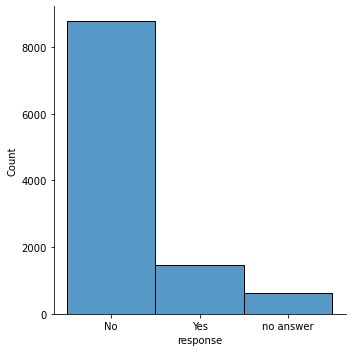

In [737]:
sns.displot(data_mca['response'], bins=100)
plt.show()
#Histogramm shows categorical data and count - how do I get total number though? 
#NC: 

In [738]:
#4: Show a plot of the response rate by the sales channel.

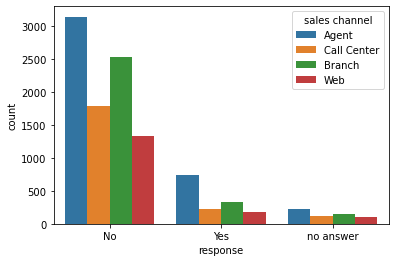

In [739]:
sns.countplot(data=data_mca, x='response',hue='sales channel')
plt.show()

In [740]:
#5: Show a plot of the response rate by the total claim amount.

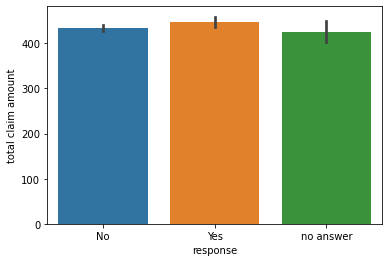

In [741]:
sns.barplot(x="response", y="total claim amount", data=data_mca)
plt.show()

In [742]:
#6: Show a plot of the response rate by income.

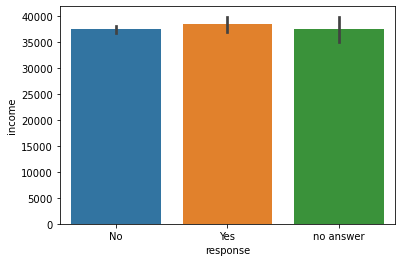

In [743]:
sns.barplot(x="response", y="income", data=data_mca)
plt.show()

# Lab4: Customer Analysis Round 2

In [744]:
#1 Check the data types of the columns. 
#Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
#(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [745]:
data_mca.head()
data_mca.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employment status                        object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [746]:
numerical=data_mca.select_dtypes(np.number)

In [747]:
numerical.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,9025.067525,23675,117,15.143806,31,0.383939,7,707.925645,1


In [748]:
categorical=data_mca.select_dtypes(object)
categorical.head()

,customer,state,response,coverage,education,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize


In [749]:
#2 Now we will try to check the normality of the numerical variables visually
    #Use seaborn library to construct distribution plots for the numerical variables
    #Use Matplotlib to construct histograms
    #Do the distributions for different numerical variables look like a normal distribution

In [750]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

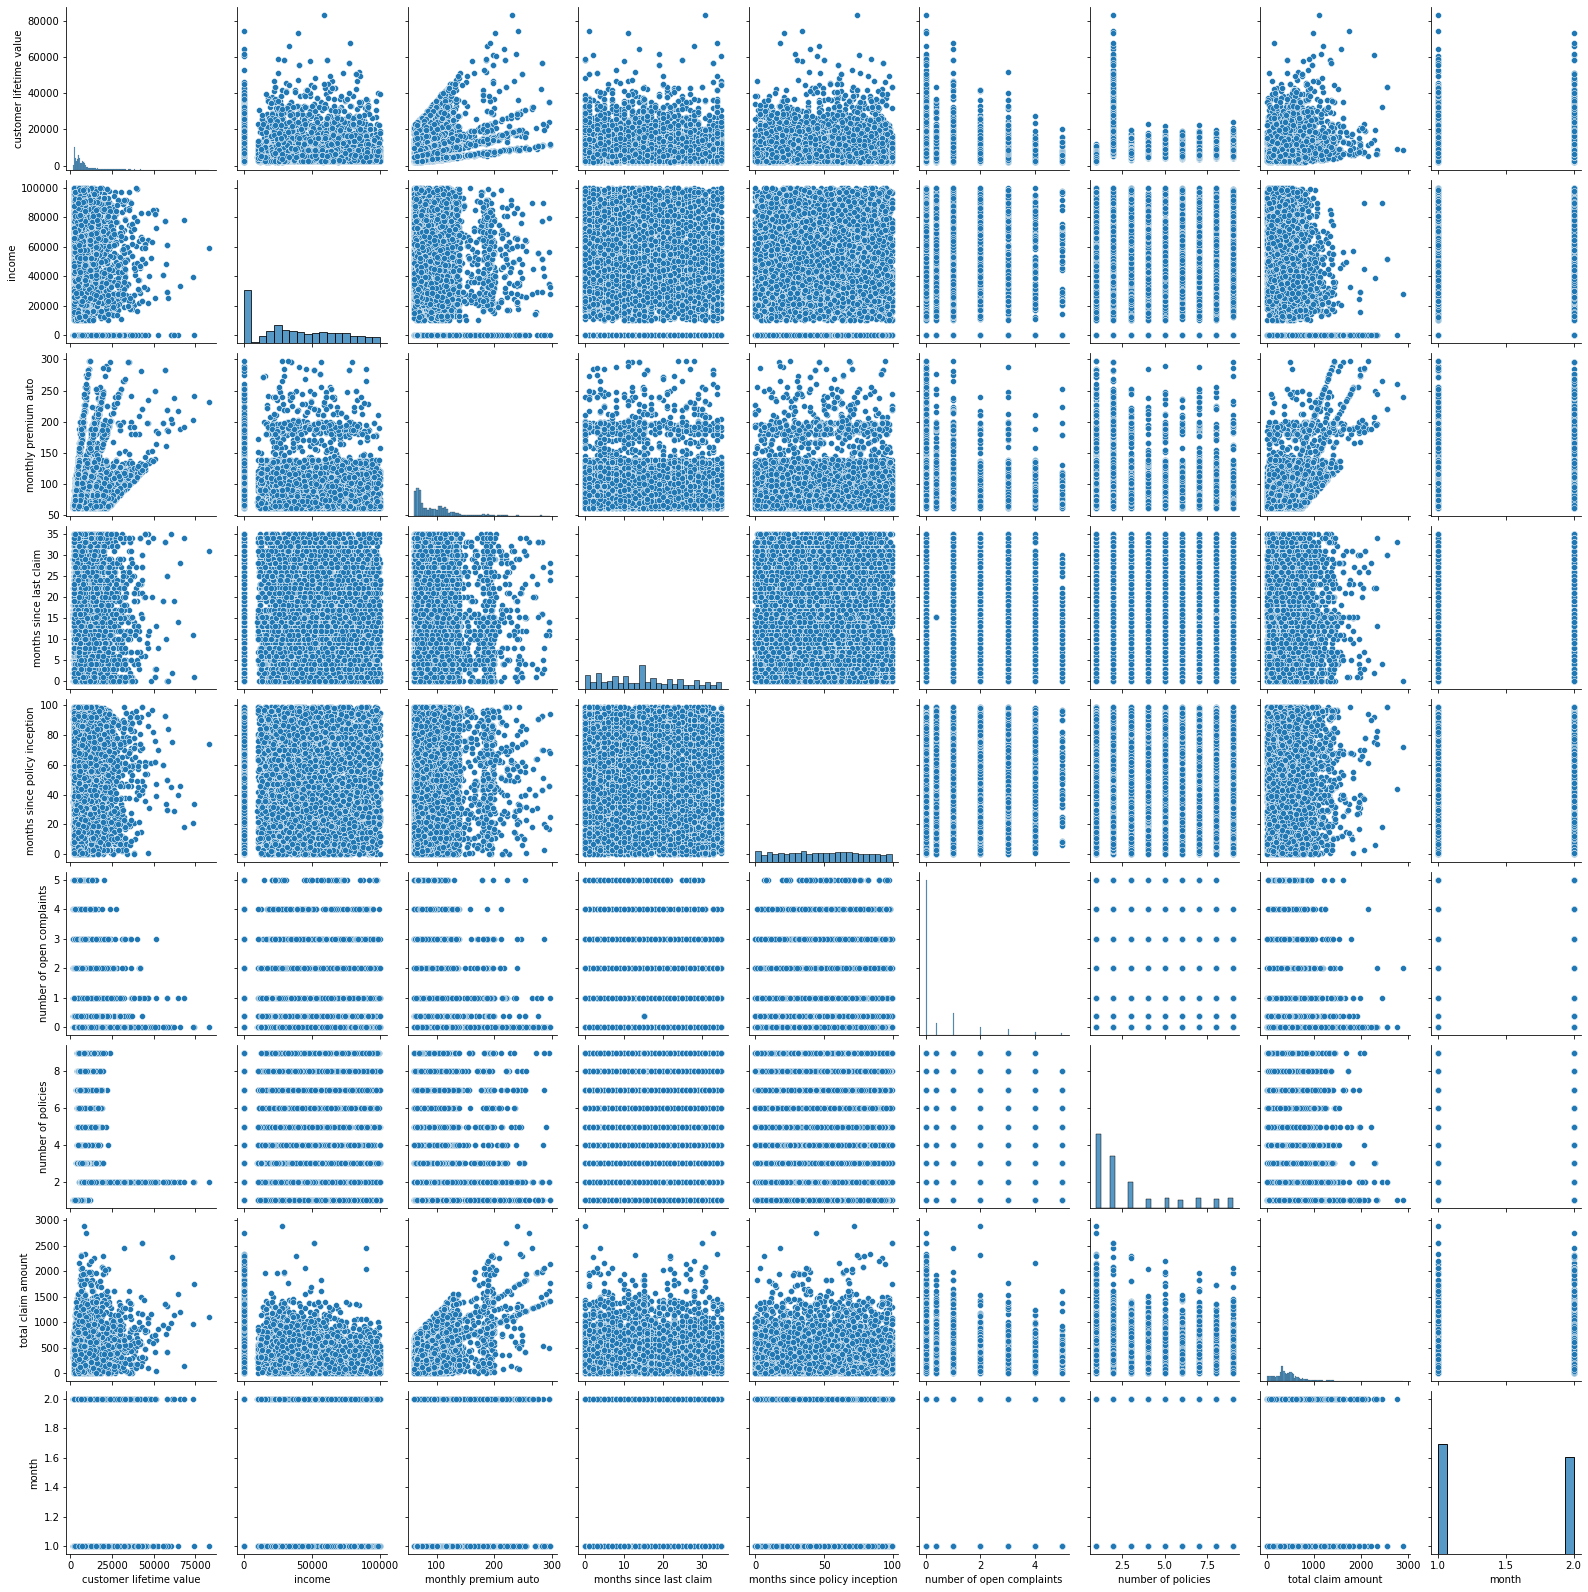

In [751]:
sns.pairplot(numerical)
plt.show()
#NC: check answer for different plotting, which is better to check the normal distribution

In [752]:
# normality found (more or less) by:
# monthly premium auto / total claim amount
# monthly premium auto / customer lifetime value
# (customer lifetime value / monthly premium auto)
#(total claum amount/monthly premium auto)

In [753]:
#3 For the numerical variables, check the multicollinearity between the features. 
#Please note that we will use the column total_claim_amount later as the target variable.

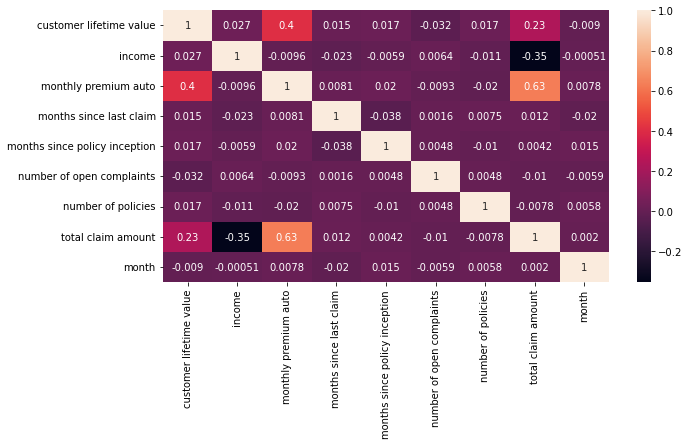

In [754]:
plt.figure(figsize=(10,5))
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [755]:
#4 Drop one of the two features that show a high correlation between them (greater than 0.9). 
#Write code for both the correlation matrix and for seaborn heatmap. 
#If there is no pair of features that have a high correlation, then do not drop any features

In [756]:
#No features have a higher correlation than .63 - therefore, I am not going to drop any feature.

# Lab5: Customer Analysis Round 2

In [757]:
#Dealing with the data --> Already done in the round 2.
#Explore the data --> Done in the round 3.

#Processing Data (Further processing...)

#1 X-y split.

In [758]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [759]:
#y=total claim amount
#X = alle außer total claim amount

X = data_mca.drop(['total claim amount'], axis=1)
y = data_mca['total claim amount']

In [760]:
X_num=X.select_dtypes(np.number)
X_cat=X.select_dtypes(object)

In [761]:
print (X.shape, X_num.shape, X_cat.shape)

(10854, 24) (10854, 8) (10854, 15)


In [762]:
#2 Normalize (numerical).

In [763]:
lm = linear_model.LinearRegression()
lm.fit(X_num,y)
print(lm.score(X_num,y))

0.5199299038667179


In [764]:
X_num.corr()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month
customer lifetime value,1.000000,0.027266,0.402116,0.015301,0.017493,-0.031727,0.016828,-0.009034
income,0.027266,1.000000,-0.009601,-0.023065,-0.005851,0.006357,-0.011435,-0.000508
monthly premium auto,0.402116,-0.009601,1.000000,0.008141,0.020248,-0.009275,-0.020109,0.007763
months since last claim,0.015301,-0.023065,0.008141,1.000000,-0.037902,0.001551,0.007455,-0.019868
months since policy inception,0.017493,-0.005851,0.020248,-0.037902,1.000000,0.004817,-0.010232,0.015444
number of open complaints,-0.031727,0.006357,-0.009275,0.001551,0.004817,1.000000,0.004847,-0.005858
number of policies,0.016828,-0.011435,-0.020109,0.007455,-0.010232,0.004847,1.000000,0.005791
month,-0.009034,-0.000508,0.007763,-0.019868,0.015444,-0.005858,0.005791,1.000000


In [765]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
pd.DataFrame(x_normalized, columns=X_num.columns)

(10854, 8)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.000000,1.000,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.000000,0.000,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.000000,0.125,1.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.000000,0.125,0.0
4,0.087527,0.236795,0.236287,0.432680,0.313131,0.076788,0.750,0.0
...,...,...,...,...,...,...,...,...
10849,0.167823,0.000000,0.810127,0.432680,0.404040,0.076788,0.750,0.0
10850,0.041281,0.611576,0.016878,0.200000,0.686869,0.000000,0.625,0.0
10851,0.270122,0.398446,0.590717,0.314286,0.636364,0.000000,0.125,1.0
10852,0.123717,0.642072,0.409283,0.000000,0.272727,0.800000,0.625,1.0


# Lab6: Customer Analysis Round 2

Processing Data (Further processing...):

    (X-y split. (done))
    (Normalize (numerical). (done))

In [766]:
#1 One Hot/Label Encoding (categorical).

In [767]:
#First: Decide, which cat columns 
# - we can drop, 
# - we can keep 
# - we can clean up in order to make the encoding more smooth.

In [768]:
X_cat.head()

,customer,state,response,coverage,education,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize


In [769]:
X_cat['education'].value_counts()

Bachelor                3255
College                 3192
High School or Below    3123
Master                   886
Doctor                   398
Name: education, dtype: int64

In [770]:
    #Decision per category:
    # customer: every ID is unique, does not help us --> drop
    # state: 6 values  --> squeeze into the 3 most common ones and other: 'California', 'Oregon', 'Arizona', 'others'
    # response: No, Yes, no answer --> keep
    # coverage: 3 values --> keep
    # education: 5 values --> clean up into 3: 'High School or Below', 'College or Bachelor', and 'Master or higher'
    # employment status: 5 values --> squeeze in: 'Employed', 'Unemployed', 'not working for other reasons'
    # gender: 2 values --> keep
    # location code: 3 values --> keep
    # marital status: 3 values --> does not seem important --> drop
    # policy type: 3 values (personal auto, corporate auto, special auto) --> keep
    # policy: 9 values, differenciating 3 values of policy type --> drop
    # renew offer type: 4 values --> keep
# sales channel: 4 values --> squeezing into 'Agent or Branch' and 'Call Center or Web'
    # vehicle class: 6 values --> vehicle size gives enough information here --> drop
    # vehicle size: 3 values --> keep

In [771]:
# dropping 4 categorical columns
X_cat = X_cat.drop(['customer','marital status','policy','vehicle class'], axis=1)
X_cat.head()

,state,response,coverage,education,employment status,gender,location code,policy type,renew offer type,sales channel,vehicle size
0,Arizona,No,Basic,College,Employed,M,Suburban,Corporate Auto,Offer3,Agent,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Personal Auto,Offer4,Call Center,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Personal Auto,Offer3,Call Center,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Corporate Auto,Offer2,Branch,Medsize
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Personal Auto,Offer1,Branch,Medsize


In [772]:
# cleaning and rearranging the values of 4 columns:

In [773]:
# state:
def clean(x):
    if x in ['Arizona']:
        return 'Arizona'
    elif x in ['California']:
        return 'California'
    elif x in ['Oregon']:
        return 'Oregon'
    else:
        return 'others'

In [774]:
X_cat['state'] = list(map(clean, X_cat['state']))

X_cat['state'].unique()

array(['Arizona', 'California', 'others', 'Oregon'], dtype=object)

In [775]:
# education:
def cleaneducation(x):
    if x in ['High School or Below']:
        return 'High School or Below'
    elif x in ['College','Bachelor']:
        return 'College or Bachelor'
    else:
        return 'Master of higher'

X_cat['education'] = list(map(cleaneducation, X_cat['education']))

In [776]:
X_cat['education'].unique()

array(['College or Bachelor', 'High School or Below', 'Master of higher'],
      dtype=object)

In [777]:
# employment status:
def cleanemploymentstatus(x):
    if x in ['Employed']:
        return 'Employed'
    elif x in ['Unemployed']:
        return 'Unemployed'
    else:
        return 'not working for other reasons'

X_cat['employment status'] = list(map(cleanemploymentstatus, X_cat['employment status']))

X_cat['employment status'].unique()

array(['Employed', 'Unemployed', 'not working for other reasons'],
      dtype=object)

In [778]:
# sales channel: 4 values --> squeezing into 'Agent or Branch' and 'Call Center or Web'
def cleansaleschannel(x):
    if x in ['Agent','Branch']:
        return 'Agent or Branch'
    else:
        return 'Call Center or Web'

X_cat['sales channel'] = list(map(cleansaleschannel, X_cat['sales channel']))

X_cat['sales channel'].unique()

array(['Agent or Branch', 'Call Center or Web'], dtype=object)

In [779]:
# Keeping the other 7 columns untouched

In [780]:
#Encode the remaining categorical columns:
from sklearn.preprocessing import OneHotEncoder

In [781]:
encoder = OneHotEncoder(drop='first').fit(X_cat)
print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
print(encoded)

[array(['Arizona', 'California', 'Oregon', 'others'], dtype=object), array(['No', 'Yes', 'no answer'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['College or Bachelor', 'High School or Below', 'Master of higher'],
      dtype=object), array(['Employed', 'Unemployed', 'not working for other reasons'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent or Branch', 'Call Center or Web'], dtype=object), array(['Large', 'Medsize', 'Small'], dtype=object)]
[[0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


In [782]:
onehot_encoded = pd.DataFrame(encoded, columns=['California', 'Oregon', 'others', 'Yes', 'no answer', 'Extended', 'Premium', 'High School or Below', 'Master of higher','Unemployed', 'not working for other reasons', 'M', 'Suburban', 'Urban', 'Personal Auto', 'Special Auto','Offer2', 'Offer3', 'Offer4', 'Call Center or Web', 'Medsize', 'Small'])
onehot_encoded.head(20)

,California,Oregon,others,Yes,no answer,Extended,Premium,High School or Below,Master of higher,Unemployed,...,Suburban,Urban,Personal Auto,Special Auto,Offer2,Offer3,Offer4,Call Center or Web,Medsize,Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [783]:
onehot_encoded.dtypes

California                       float64
Oregon                           float64
others                           float64
Yes                              float64
no answer                        float64
Extended                         float64
Premium                          float64
High School or Below             float64
Master of higher                 float64
Unemployed                       float64
not working for other reasons    float64
M                                float64
Suburban                         float64
Urban                            float64
Personal Auto                    float64
Special Auto                     float64
Offer2                           float64
Offer3                           float64
Offer4                           float64
Call Center or Web               float64
Medsize                          float64
Small                            float64
dtype: object

In [791]:
x_normalized=pd.DataFrame(x_normalized, columns=X_num.columns)
onehot_encoded = pd.DataFrame(encoded, columns=['California', 'Oregon', 'others', 'Yes', 'no answer', 'Extended', 'Premium', 'High School or Below', 'Master of higher','Unemployed', 'not working for other reasons', 'M', 'Suburban', 'Urban', 'Personal Auto', 'Special Auto','Offer2', 'Offer3', 'Offer4', 'Call Center or Web', 'Medsize', 'Small'])

In [792]:
#2 Concat DataFrames

In [793]:
import pandas as pd

In [794]:
X = pd.concat([x_normalized, onehot_encoded], axis=1)
X.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month,California,Oregon,...,Suburban,Urban,Personal Auto,Special Auto,Offer2,Offer3,Offer4,Call Center or Web,Medsize,Small
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.000000,1.000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.000000,0.000,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.000000,0.125,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.000000,0.125,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.087527,0.236795,0.236287,0.432680,0.313131,0.076788,0.750,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Linear Regression:

In [ ]:
#3 Train-test split.

In [796]:
y = data_mca['total claim amount']
y.head()

0    292.800000
1    744.924331
2    480.000000
3    484.013411
4    707.925645
Name: total claim amount, dtype: float64

In [798]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [799]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8683, 30)
(2171, 30)
(8683,)
(2171,)


In [ ]:
#4 Apply linear regression.

In [800]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [801]:
# Training for the Model:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7601242678048736

In [802]:
#Prediction on the Test Data:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

# The prediction on the test data has a higher score than the training model!

0.7610533605002741

In [ ]:
#Model Validation:

In [ ]:
#5 Description: R2. MSE. RMSE. MAE.

In [808]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

In [809]:
#R2:
r2 = r2_score(y_test, predictions_test)
r2

0.7610533605002741

In [810]:
#MSE:
mse=mean_squared_error(y_test,predictions_test)
mse

20121.901220077212

In [811]:
#RMSE:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

141.8516874065205

In [812]:
#MAE:
mae = mean_absolute_error(y_test, predictions_test)
mae

98.45966576094628

# Lab7: Customer Analysis Round 2

Modeling

In [ ]:
#1: Description: Try to improve the linear regression model.

In [ ]:
#NC: ideas: getting rid of columns that are not doing anything to target, try standardmixer, 
            #try to clean up more (decimals? other things?)

# Final Lab: Customer Analysis Round 2